<h2 style="text-align: center;">Task Set 2</h2>
<h1 style="text-align: center;">Intensity of the point process</h1>

#### 1.  Wczytanie potrzebnych pakietów

In [2]:
library(spatstat)

Ładowanie wymaganego pakietu: spatstat.data

Ładowanie wymaganego pakietu: spatstat.univar

spatstat.univar 3.1-1

Ładowanie wymaganego pakietu: spatstat.geom

spatstat.geom 3.3-4

Ładowanie wymaganego pakietu: spatstat.random

spatstat.random 3.3-2

Ładowanie wymaganego pakietu: spatstat.explore

Ładowanie wymaganego pakietu: nlme

spatstat.explore 3.3-3

Ładowanie wymaganego pakietu: spatstat.model

Ładowanie wymaganego pakietu: rpart

spatstat.model 3.3-3

Ładowanie wymaganego pakietu: spatstat.linnet

spatstat.linnet 3.2-3


spatstat 3.3-0 
For an introduction to spatstat, type 'beginner' 




#### 2. Wczytanie obiektu klasy $ppp$
Wczytaj obiekt klasy `ppp` o nazwie `murchison`, który znajduje się w pakiecie `spatstat`. Dane te
reprezentują lokalizację złoż złota wraz z geologią obszaru Murchison w zachodniej Australii.
Zestaw danych składa się z trzech elementów:
- `gold` – proces punktowy występowania złóż złota
- `faults` – położenie uskoków
- `greenstone`- obszary występowania wychodni zieleńców 

In [3]:
# Wczytanie danych
data(murchison)
cat("Obiekt `murchison` zawiera następujące dane geologiczne obszaru Murchison:\n")
print(murchison)

# Wydzielenie poszczególnych elementów obiektu
gold <- murchison$gold
faults <- murchison$faults
greenstone <- murchison$greenstone

# Wyświetlenie informacji o złóż złota
cat("\nProces punktowy `gold` - lokalizacja złóż złota:\n")
print(gold)

# Wyświetlenie informacji o uskokach
cat("\nElement `faults` - położenie uskoków:\n")
print(faults)

# Wyświetlenie informacji o wychodniach zieleńców
cat("\nElement `greenstone` - obszary występowania wychodni zieleńców:\n")
print(greenstone)

Obiekt `murchison` zawiera następujące dane geologiczne obszaru Murchison:
List of spatial objects

gold:
Planar point pattern: 255 points
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres

faults:
planar line segment pattern: 3252 line segments
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres

greenstone:
window: polygonal boundary
enclosing rectangle: [352782.9, 681699.6] x [6706467, 7100804] metres

Proces punktowy `gold` - lokalizacja złóż złota:
Planar point pattern: 255 points
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres

Element `faults` - położenie uskoków:
planar line segment pattern: 3252 line segments
window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres

Element `greenstone` - obszary występowania wychodni zieleńców:
window: polygonal boundary
enclosing rectangle: [352782.9, 681699.6] x [6706467, 7100804] metres


#### 3. Wyświetlenie mapy i sprawdzenie klasy zmiennych
Wyświetl mapę na której będą: `lokalizacje złóż złota`, `położenie uskoków` oraz `występowanie
wychodni zieleńców`. Sprawdź i wyjaśnij klasę każdej ze zmiennej (gold, faults, greenstone).

Klasa zmiennej `gold` (lokalizacje złóż złota):  ppp 
Klasa zmiennej `faults` (położenie uskoków):  psp list 
Klasa zmiennej `greenstone` (wychodnie zieleńców):  owin 

Wyjaśnienie klas zmiennych:
- `gold`: Punktowy proces przestrzenny (`ppp`) reprezentujący lokalizacje złóż złota.
- `faults`: Segmentowy proces przestrzenny (`psp`) reprezentujący linie uskoków.
- `greenstone`: Okno przestrzenne (`owin`) definiujące granice obszaru analizy.


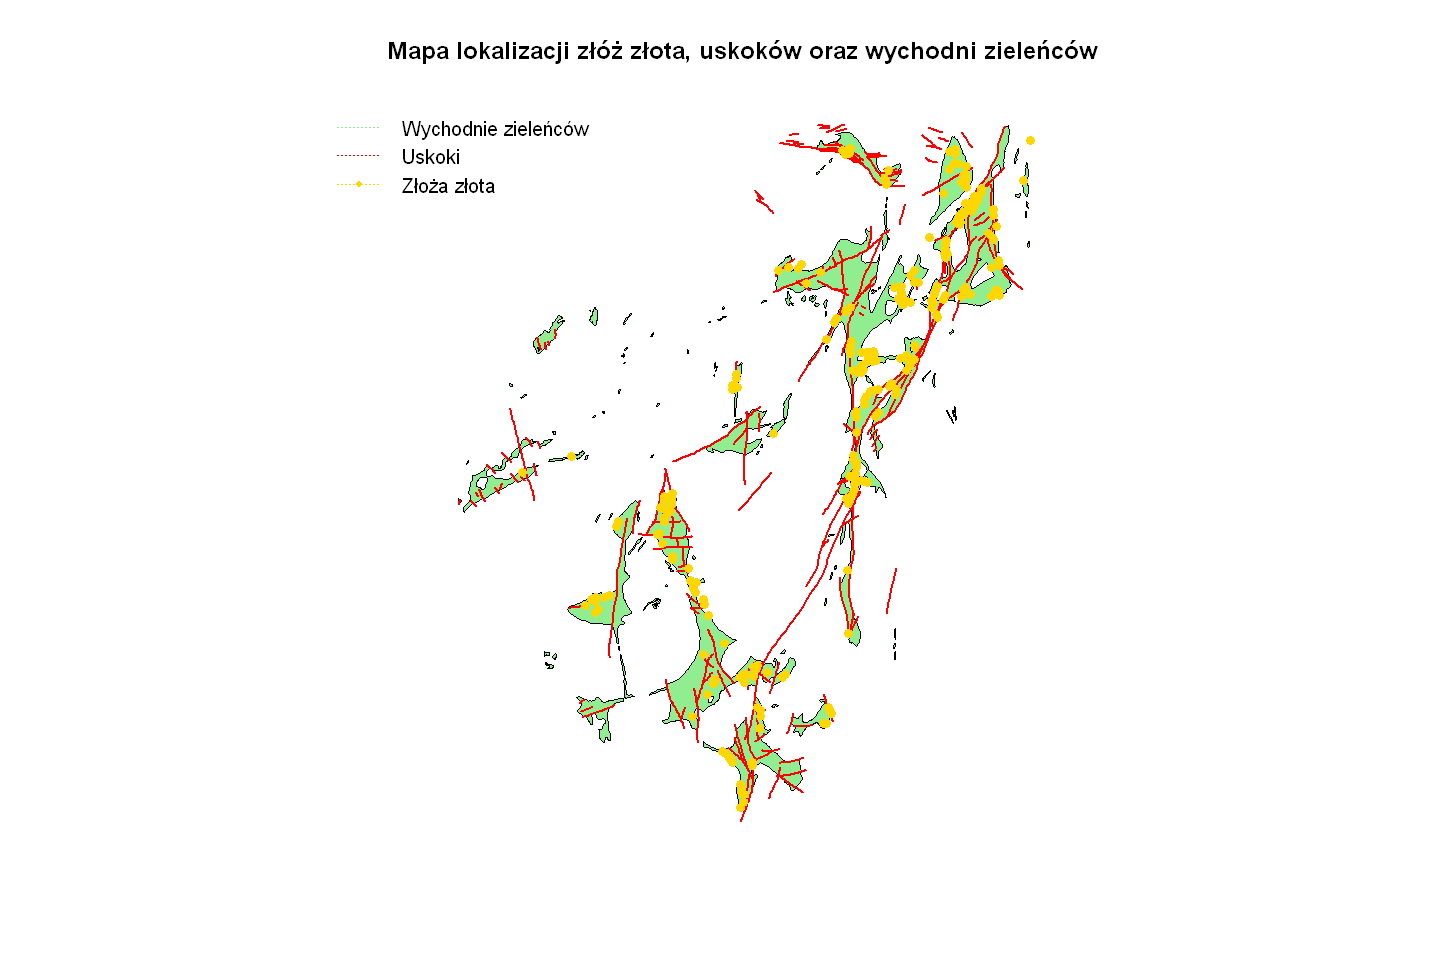

In [4]:
# Sprawdzenie klasy zmiennych
gold_class <- class(gold)
faults_class <- class(faults)
greenstone_class <- class(greenstone)

# Wypisanie klas zmiennych
cat("Klasa zmiennej `gold` (lokalizacje złóż złota): ", gold_class, "\n")
cat("Klasa zmiennej `faults` (położenie uskoków): ", faults_class, "\n")
cat("Klasa zmiennej `greenstone` (wychodnie zieleńców): ", greenstone_class, "\n")

# Wyjaśnienie klas:
cat("\nWyjaśnienie klas zmiennych:\n")
cat("- `gold`: Punktowy proces przestrzenny (`ppp`) reprezentujący lokalizacje złóż złota.\n")
cat("- `faults`: Segmentowy proces przestrzenny (`psp`) reprezentujący linie uskoków.\n")
cat("- `greenstone`: Okno przestrzenne (`owin`) definiujące granice obszaru analizy.\n")

options(repr.plot.width = 12, repr.plot.height = 8) # Ustawienie szerokości okna

# Wyświetlenie mapy
plot(greenstone, main = "Mapa lokalizacji złóż złota, uskoków oraz wychodni zieleńców", xlab = "Współrzędna X", 
     ylab = "Współrzędna Y", col = "lightgreen")
plot(faults, add = TRUE, col = "red", lwd = 2)
plot(gold, add = TRUE, col = "gold", pch = 16)

# Dodanie legendy
legend("topleft", legend = c("Wychodnie zieleńców", "Uskoki", "Złoża złota"),
       col = c("lightgreen", "red", "gold"), lty = 3, pch = c(NA, NA, 20), bty = "n")


#### 4. Obliczenie estymatora $\hat{λ}$
Dla złoż złoża oblicz estymator $\hat{λ}$ używając funkcji `summary()`.

In [4]:
# Obliczenie estymatora intensywności λ
gold_summary <- summary(gold)

# Wyświetlenie podsumowania obiektu gold
cat("Podsumowanie dla zmiennej `gold` (złoża złota):\n")
print(gold_summary)

# Wyciągnięcie wartości intensywności
lambda_hat <- gold_summary$intensity

# Wyświetlenie wartości estymatora intensywności λ
cat("\n\nEstymator intensywności λ wynosi: ", lambda_hat, "\n")

Podsumowanie dla zmiennej `gold` (złoża złota):
Planar point pattern:  255 points
Average intensity 1.924569e-09 points per square metre

Coordinates are given to 1 decimal place
i.e. rounded to the nearest multiple of 0.1 metres

Window: rectangle = [352782.9, 682589.6] x [6699742, 7101484] metres
                    (329800 x 401700 metres)
Window area = 1.32497e+11 square metres
Unit of length: 1 metre


Estymator intensywności λ wynosi:  1.924569e-09 


#### 5. Wizualizacja mapy rozmieszczenia złóż złota i zliczanie punktów w kwadratach 
Wyświetl mapę rozmieszczenia samych złóż złota. Wykonaj zliczenie punktów w kwadratach
dzieląc obszar na siatkę 5x5. Estymacja funkcji intensywności odbywa się przez zliczanie punktów
w podobszarach. Przedstaw wynik nakładając go na mapę rozmieszczenia punktów. 

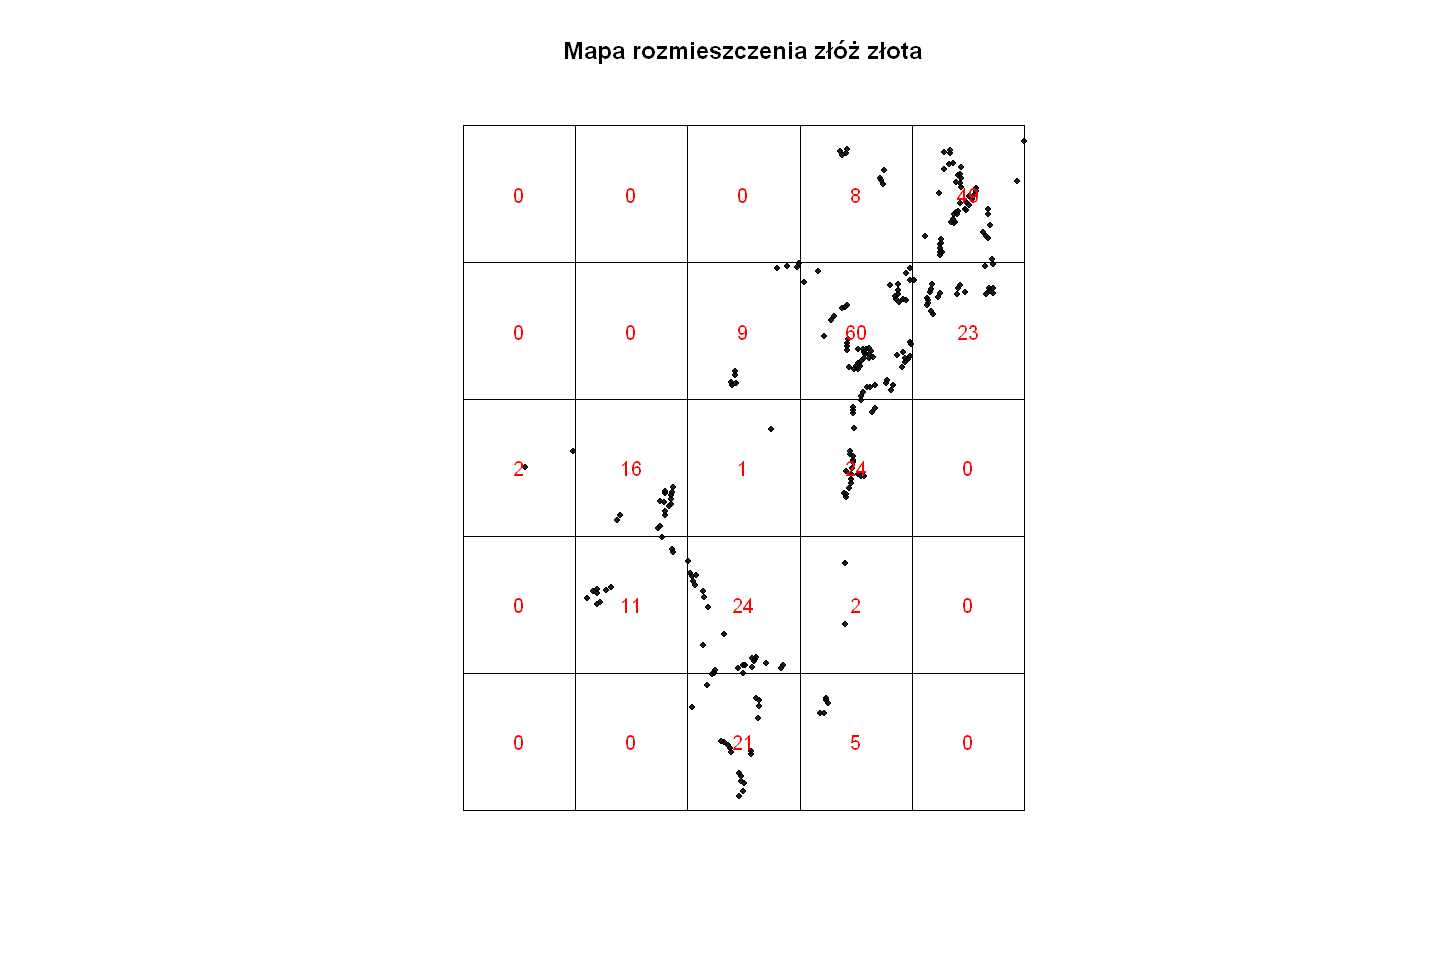

In [5]:
options(repr.plot.width = 12, repr.plot.height = 8) # Ustawienie szerokości okna

# Wyświetlenie mapy rozmieszczenia złóż złota
plot(gold, main = "Mapa rozmieszczenia złóż złota", pch = 20, 
     xlab = "Współrzędna X", ylab = "Współrzędna Y")

# Zliczanie punktów w kwadratach na siatce 5x5
quadrat_counts <- quadratcount(gold, nx = 5, ny = 5)

# Nałożenie wyniku zliczeń na mapę rozmieszczenia punktów
plot(quadrat_counts, add = TRUE, col = "red")

#### 6. Test jednorodności rozmieszczenia złóż złota
Jednym ze sposobów sprawdzenia czy wynik otrzymany poprzez zliczanie punktów w
podobszarach świadczy o intensywności niejednorodnej jest przeprowadzenie `testu istotności
statystycznej`. Załóż hipotezę zerową o całkowicie losowym rozmieszczeniu. Wykonaj test
świadczący o jednorodności rozmieszczenia zbioru punktowego za pomocą funkcji `quadrat.test()`.
Wykonaj zliczenia w siatce 5x5. 


Wynik testu jednorodności rozmieszczenia złóż złota:

	Chi-squared test of CSR using quadrat counts

data:  gold
X2 = 595.88, df = 24, p-value < 2.2e-16
alternative hypothesis: two.sided

Quadrats: 5 by 5 grid of tiles

Wartość p (p-value):  3.446524e-110 
Na podstawie wartości p =  3.446524e-110 można odrzucić hipotezę zerową o losowym rozmieszczeniu punktów.


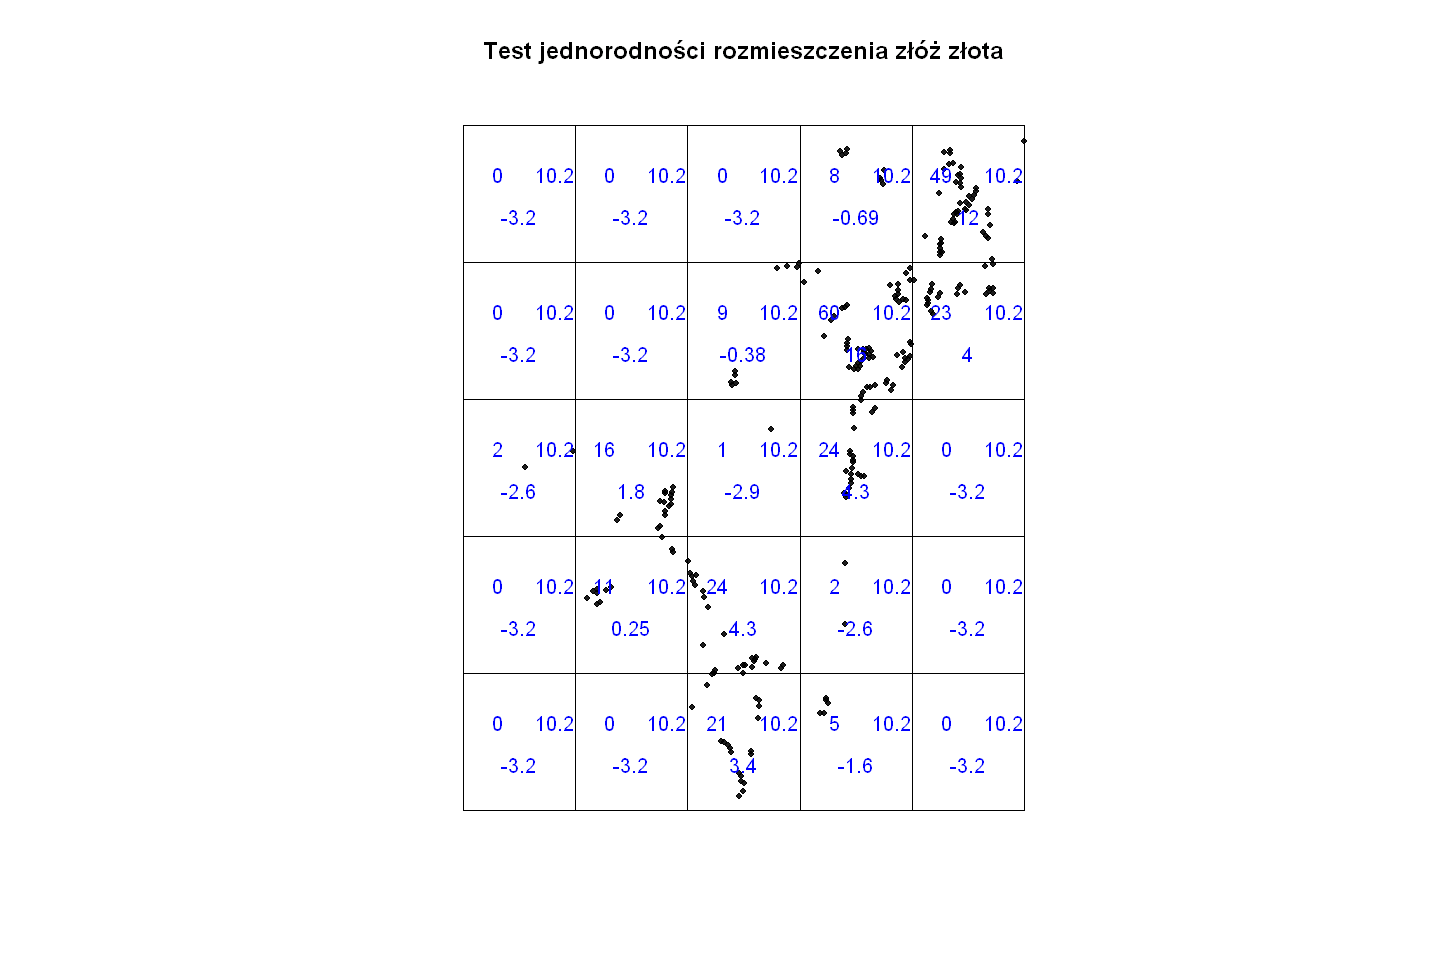

In [6]:
# Przeprowadzenie testu jednorodności rozmieszczenia za pomocą funkcji quadrat.test()
quadrat_test_result <- quadrat.test(gold, nx = 5, ny = 5)

# Wyświetlenie wyników testu w konsoli
cat("Wynik testu jednorodności rozmieszczenia złóż złota:\n")
print(quadrat_test_result)

options(repr.plot.width = 12, repr.plot.height = 8) # Ustawienie szerokości okna

# Wyświetlenie mapy rozmieszczenia złóż złota wraz z wynikami testu
plot(gold, main = "Test jednorodności rozmieszczenia złóż złota", 
     pch = 20, xlab = "Współrzędna X", ylab = "Współrzędna Y")

# Dodanie wyników testu do mapy
plot(quadrat_test_result, add = TRUE, col = "blue")

# Wyświetlenie wartości p-value
cat("\nWartość p (p-value): ", quadrat_test_result$p.value, "\n")

# Interpretacja wyniku na podstawie wartości p
if (quadrat_test_result$p.value < 0.05) {
  cat("Na podstawie wartości p = ", quadrat_test_result$p.value, "można odrzucić hipotezę zerową o losowym rozmieszczeniu punktów.\n")
} else {
  cat("Nie ma wystarczających dowodów do odrzucenia hipotezy zerowej o losowym rozmieszczeniu punktów.\n")
}

#### 7. Prezentacja estymatora jądrowego gęstości złóż złota przy użyciu funkcji $density()$
Przedstaw estymator jądrowy gęstości dla lokalizacji złóż złota używając funkcji `density()`.

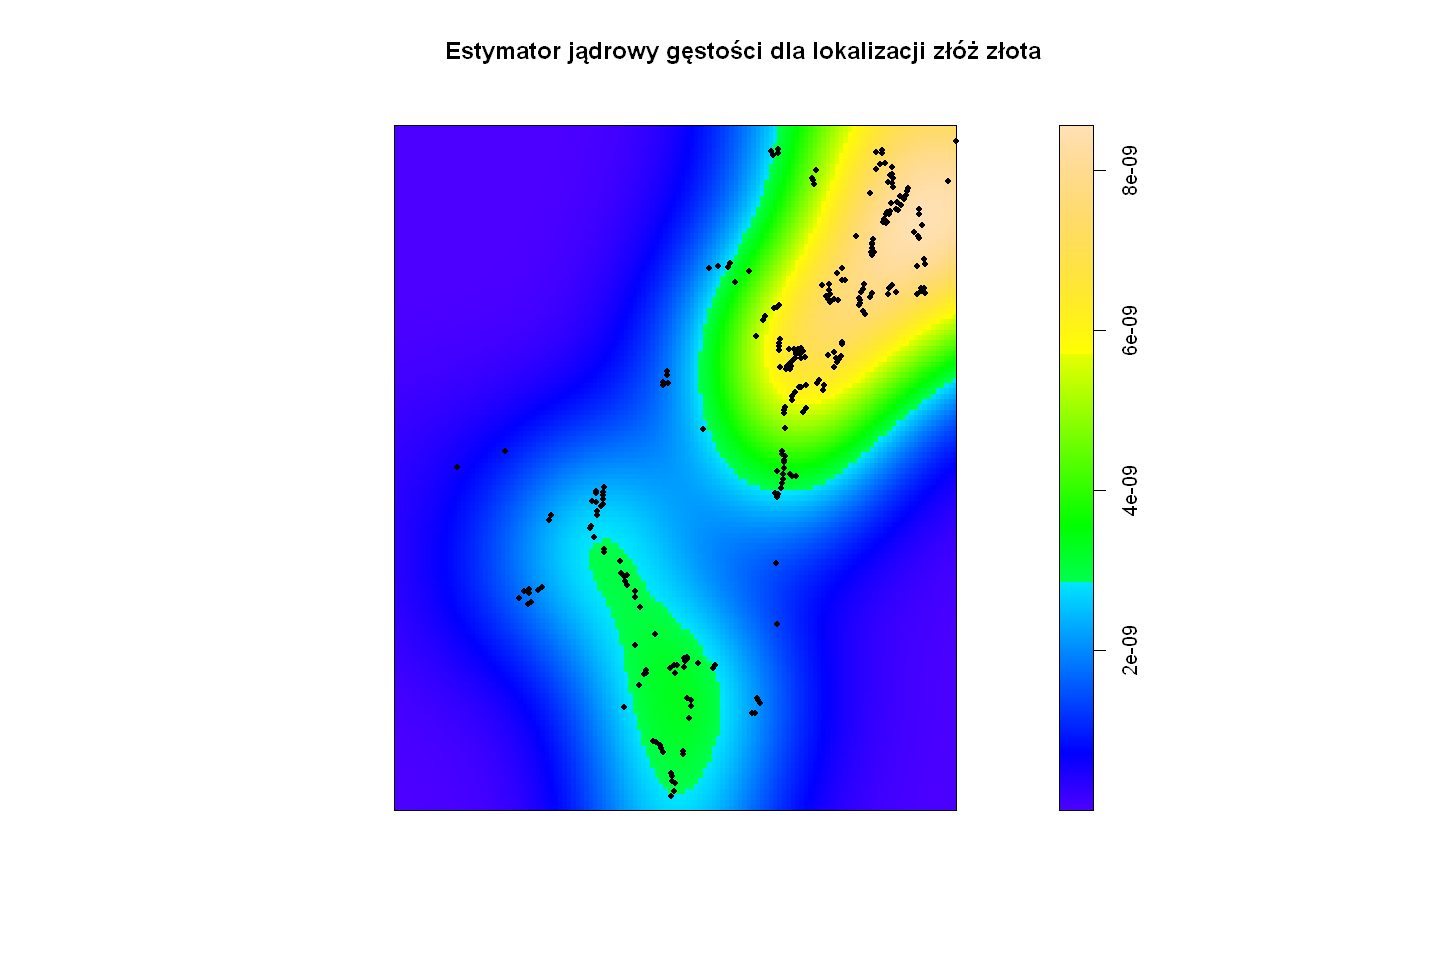

In [7]:
# Obliczenie estymatora jądrowego gęstości dla lokalizacji złóż złota
gold_density <- density(gold)

options(repr.plot.width = 12, repr.plot.height = 8) # Ustawienie szerokości okna

# Wyświetlenie estymatora jądrowego gęstości na wykresie
plot(gold_density, 
     main = "Estymator jądrowy gęstości dla lokalizacji złóż złota", 
     col = topo.colors(1000), 
     xlab = "Współrzędna X", 
     ylab = "Współrzędna Y")

# Dodanie punktów złóż złota do wykresu
plot(gold, add = TRUE, col = "black", pch = 20)

#### 8. Analiza intensywności złóż złota przy użyciu estymatora jądrowego gęstości
Wartość zwracana przez funkcję density jest klasy `„im”` (pixel image). Klasa ta posiada metody :
print, summary, plot, contour (contour plots), persp (perspective plots) itp. Przetestuj podane
metody i wyświetl wynik intensywności w postaci mapy 3D oraz izolinii 2D. 

real-valued pixel image
128 x 128 pixel array (ny, nx)
enclosing rectangle: [352780, 682590] x [6699700, 7101500] metres


real-valued pixel image
128 x 128 pixel array (ny, nx)
enclosing rectangle: [352782.9, 682589.6] x [6699742, 7101484] metres
dimensions of each pixel: 2580 x 3138.609 metres
Image is defined on the full rectangular grid
Frame area = 132497203271.401 square metres
Pixel values
	range = [1.42788e-14, 8.555355e-09]
	integral = 265.3118
	mean = 2.002396e-09

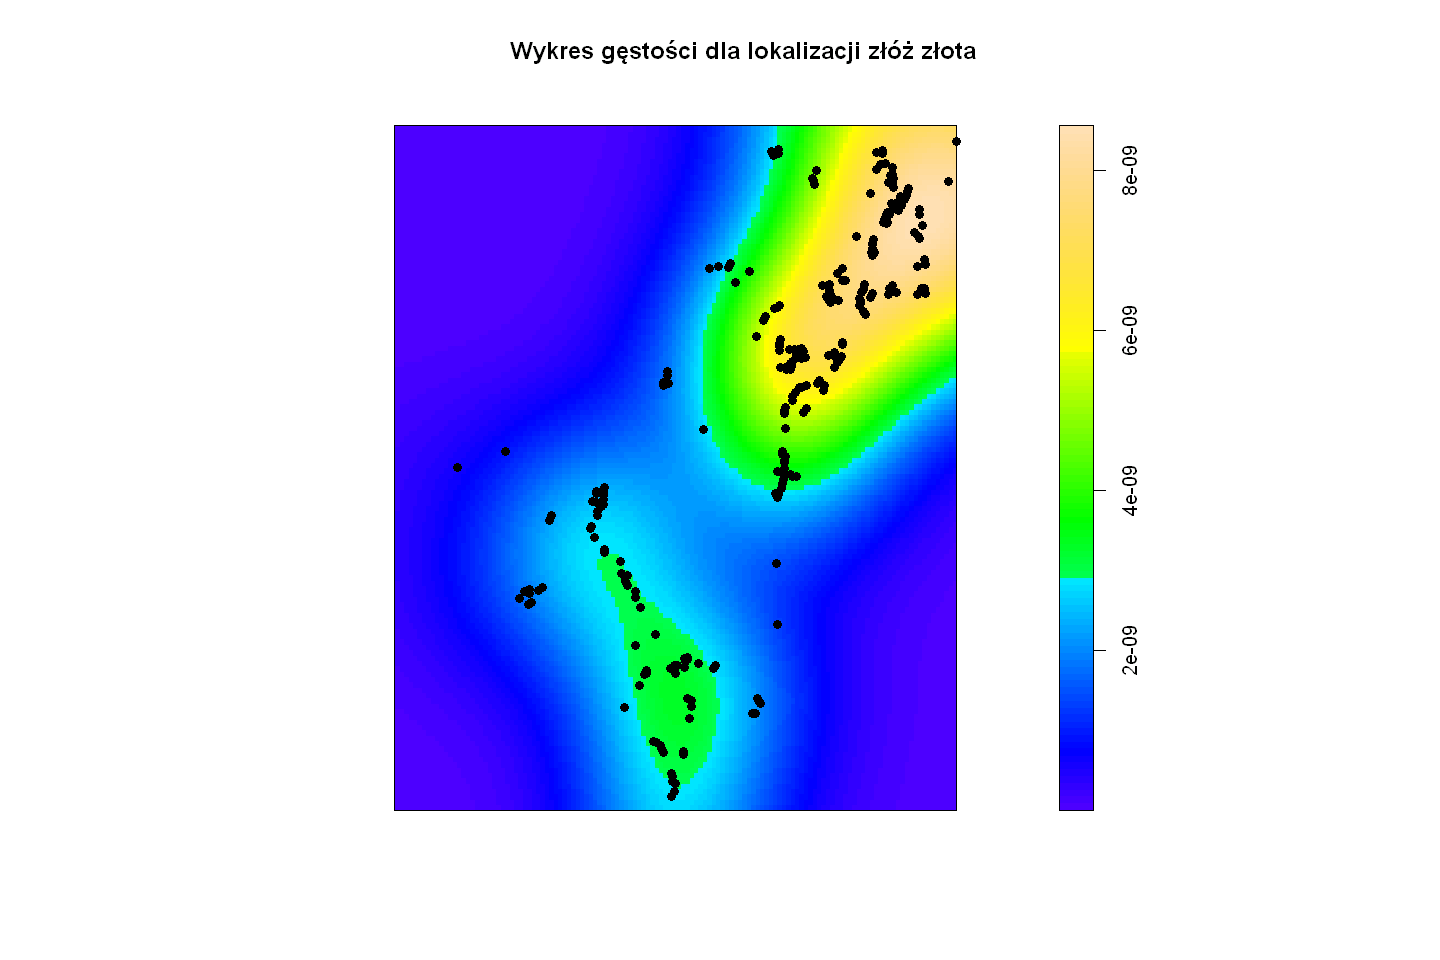

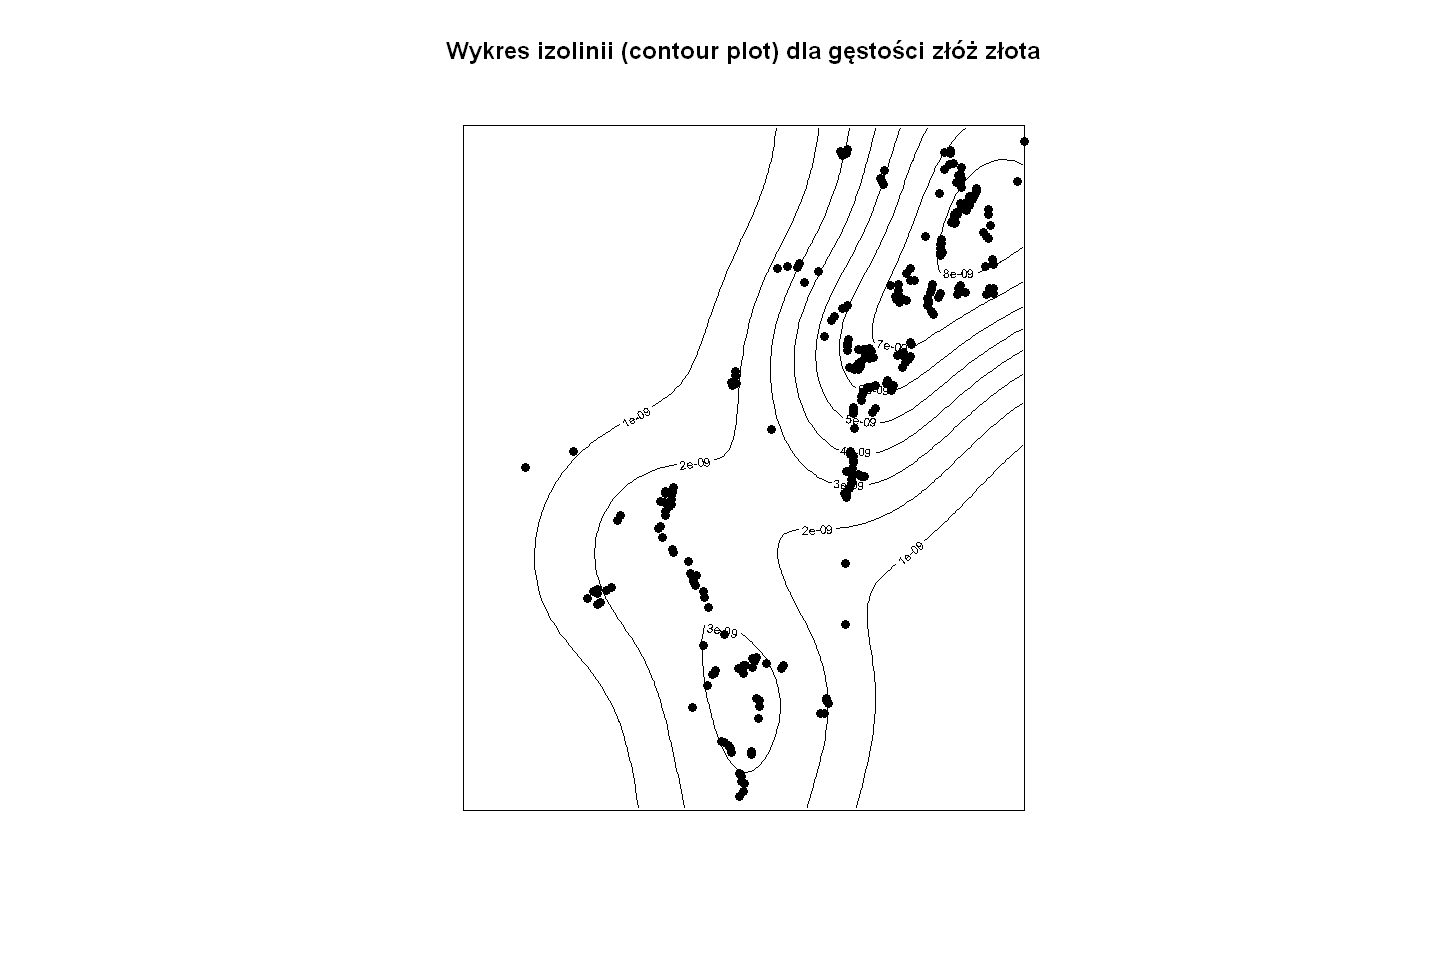

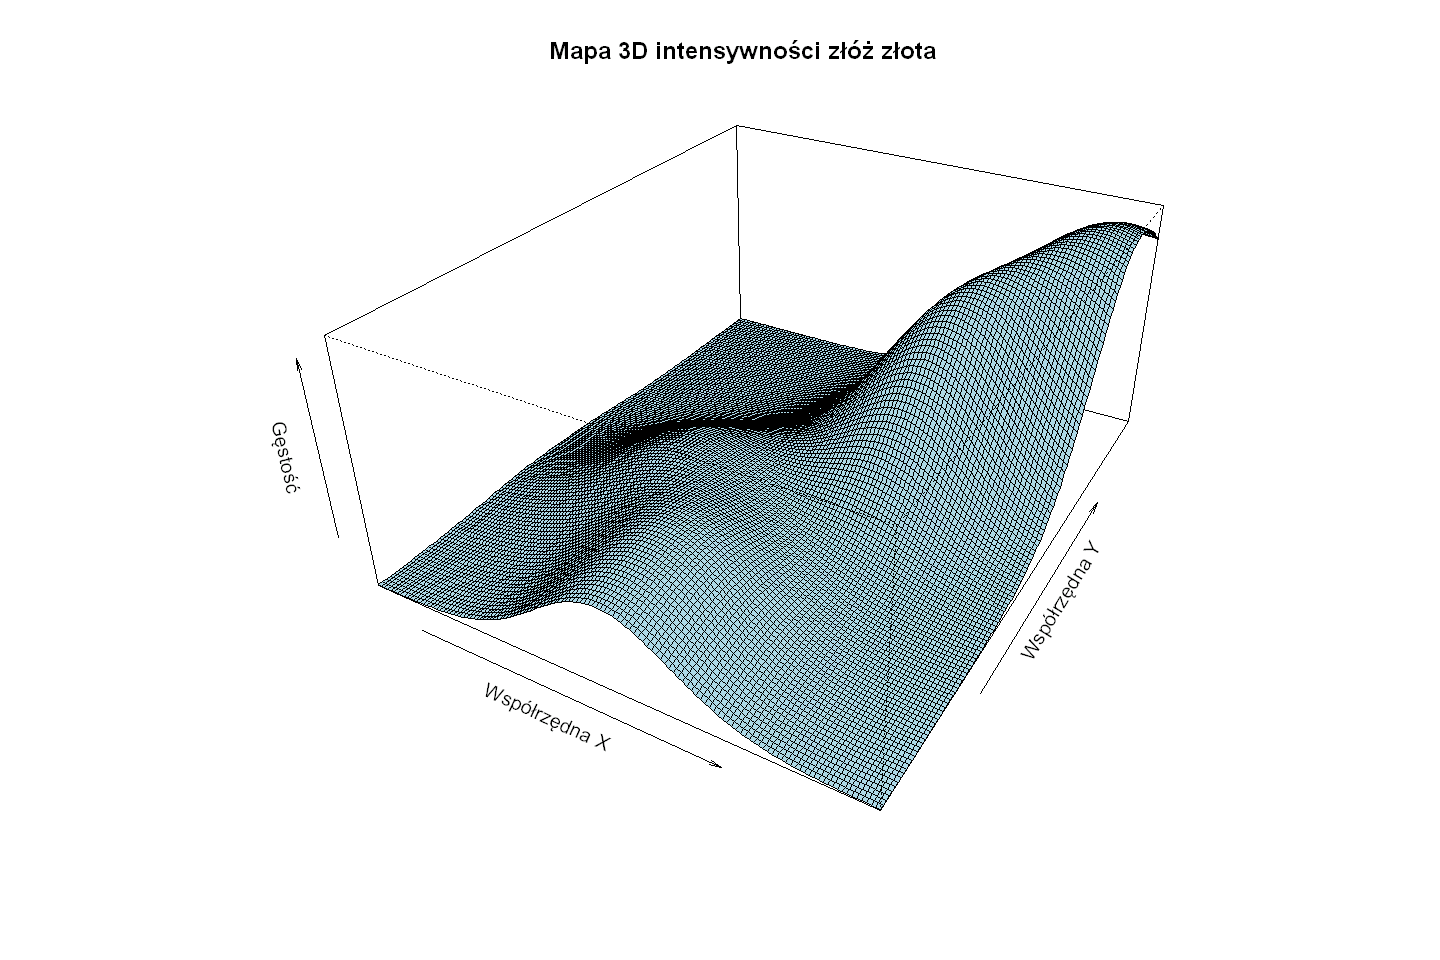

In [8]:
# Wyświetlenie podstawowych informacji o obiekcie gęstości
print(gold_density)
summary(gold_density)

options(repr.plot.width = 12, repr.plot.height = 8) # Ustawienie szerokości okna

# Wykres estymatora jądrowego gęstości
plot(gold_density, 
     main = "Wykres gęstości dla lokalizacji złóż złota", 
     col = topo.colors(100), 
     xlab = "Współrzędna X", 
     ylab = "Współrzędna Y")
plot(gold, add = TRUE, col = "black", pch = 16) 

# Wykres izolinii (contour plot) gęstości
contour(gold_density, 
        main = "Wykres izolinii (contour plot) dla gęstości złóż złota", 
        xlab = "Współrzędna X", 
        ylab = "Współrzędna Y")
plot(gold, add = TRUE, col = "black", pch = 16)

# Mapa 3D intensywności złóż złota
persp(gold_density, 
      main = "Mapa 3D intensywności złóż złota", 
      col = "lightblue", 
      theta = 30, 
      phi = 30, 
      xlab = "Współrzędna X", 
      ylab = "Współrzędna Y", 
      zlab = "Gęstość")